#**Criando gráficos de distribuição**

##**Carregando os dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/loja_vendas.csv')

In [ ]:
df.head()

ID_compra            unidade                 cidade        data horario  \
0          6  Parque das nações            Santo André  2022-01-03   15:40   
1          5       Oswaldo Cruz     São Caetano do Sul  2022-01-03   16:48   
2          9          Paulicéia  São Bernardo do Campo  2022-01-03   12:08   
3          4       Oswaldo Cruz     São Caetano do Sul  2022-01-03    9:29   
4          8  Parque das nações            Santo André  2022-01-03   13:02   

            categoria_produto  valor_unitario  quantidade  valor_total  \
0                 Eletrônicos          4457.9           4      17831.6   
1    Ferramentas e construção           115.9           1        115.9   
2  Beleza e cuidados pessoais            68.9           2        137.8   
3    Ferramentas e construção            80.9           5        404.5   
4  Beleza e cuidados pessoais           165.0           4        660.0   

  metodo_pagamento  ID_cliente programa_cashback  idade  avaliacao_compra  
0         Dinheiro        6149               Sim     30                10  
1              PIX        9491               Sim     36                 9  
2           Cartão        5288               Não     39                 9  
3              PIX        9679               Sim     35                10  
4              PIX        1380               Não     50                 9

Neste conjunto de dados, temos informações de uma loja de departamentos, incluindo registros das compras realizadas pelos clientes. Os dados abrangem variáveis numéricas, categóricas e as datas e horários das compras.

Analisar a **distribuição de dados** nos ajuda a entender **como os valores se espalham ao longo de uma variável**. Isso revela **padrões** e até mesmo possíveis **outliers** (valores discrepantes), proporcionando insights importantes sobre o comportamento dos dados.

Para criar os gráficos, utilizaremos a [biblioteca Seaborn](https://seaborn.pydata.org/index.html), que é uma ferramenta poderosa e intuitiva para criar visualizações de dados:

In [ ]:
import seaborn as sns

##**Histograma**

Podemos, por exemplo, analisar a distribuição das idades dos clientes dessa loja de departamentos, para entender como elas variam entre os consumidores. Isso nos ajudaria a identificar faixas etárias predominantes e compreender melhor o perfil demográfico da loja.

Para visualizarmos essa distribuição, um gráfico muito útil é o **histograma**. Ele nos permite **observar como os dados se distribuem ao longo de diferentes faixas de valores**, revelando padrões, concentrações e a dispersão das idades dos clientes.

Podemos criar o histrograma com a função [`sns.histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html). Essa função, possui um parâmetro essencial chamado `bins`. Ele define o **número de intervalos** em que os dados serão divididos. A escolha de um número adequado de `bins` influencia a aparência do histograma, podendo revelar mais ou menos detalhes sobre a distribuição dos dados.

> 👩‍💻***Dica da Val:*** Se escolhermos um número muito baixo de `bins`, o gráfico pode ficar muito simplificado e perder informações importantes. Por outro lado, um número muito alto pode tornar o gráfico excessivamente granular, dificultando a visualização de padrões claros. Ajustar o número de `bins` é, portanto, uma parte fundamental para criar histogramas eficazes.

In [ ]:
sns.histplot(df['idade'], bins=10)

<Axes: xlabel='idade', ylabel='Count'>

Também podemos adicionar o parâmetro `kde=True`, para adicionar uma curva de densidade ao histograma. A curva de densidade kernel (KDE) suaviza a distribuição dos dados, proporcionando uma visualização mais clara e contínua de como os valores estão distribuídos ao longo do intervalo:

In [ ]:
sns.histplot(df['idade'], bins=10, kde=True)

<Axes: xlabel='idade', ylabel='Count'>

Falando em KDE, também temos o **KDE plot**, que pode ser criado com a função [sns.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) uma maneira de visualizar a distribuição de dados de forma contínua, sem as limitações de intervalos discretos do histograma. Em vez de dividir os dados em "bins", como no histograma, o KDE cria uma **estimativa suave da função de densidade de probabilidade dos dados**:

> 👩‍💻***Dica da Val:*** O KDE é particularmente útil quando se quer observar a distribuição sem a "granularidade" de um histograma e é frequentemente usado para comparar diferentes distribuições de dados.

<Axes: xlabel='idade', ylabel='Density'>

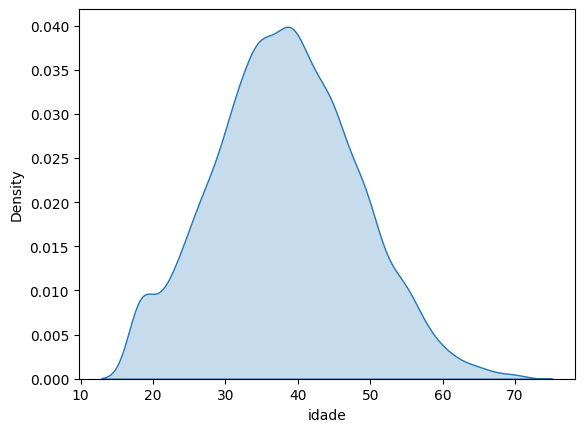

In [ ]:
sns.kdeplot(df['idade'], fill=True)

##**Boxplot**

Além do histograma e do KDE plot, outro gráfico útil para visualizar a distribuição dos dados é o boxplot, que pode ser criado com a função [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Ao plotar a idade, temos a caixa do boxplot que representa a faixa entre o **primeiro quartil (Q1)** e o **terceiro quartil (Q3)**, enquanto a linha dentro da caixa indica a **mediana**. As extremidades das linhas (ou "bigodes") mostram a **variação dos dados**, e os pontos fora dessas linhas representam os **outliers**.

O boxplot é especialmente útil para comparar distribuições de várias variáveis ou para verificar a dispersão de um conjunto de dados, proporcionando uma **visão rápida e clara das características centrais e da variabilidade dos dados**.

In [ ]:
sns.boxplot(y='idade', data=df)

<Axes: ylabel='idade'>

Também é possível **analisar duas variáveis**, como, por exemplo, a idade dos clientes em função de cada tipo de método de pagamento utilizado. Isso nos permite observar se há padrões ou diferenças nas idades conforme o método de pagamento escolhido, ajudando a identificar possíveis tendências ou comportamentos específicos de grupos de clientes:

<Axes: xlabel='metodo_pagamento', ylabel='idade'>

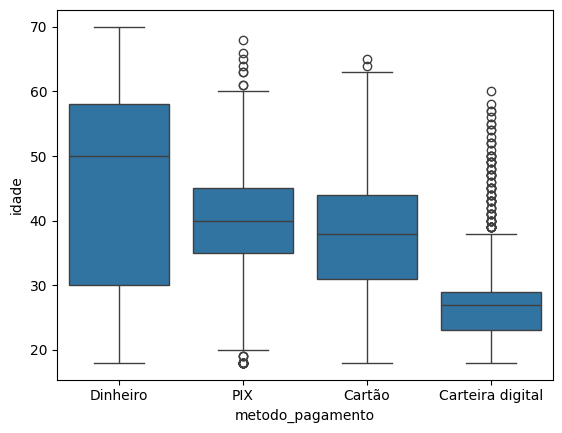

In [ ]:
sns.boxplot(x='metodo_pagamento', y='idade', data=df)

##**Violinplot**

Já o violinplot, que pode ser criado com a função [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) é uma versão mais detalhada do boxplot que exibe não somente os quartis, mas também a distribuição dos dados por meio da **representação da forma e suavidade da distribuição**:

In [ ]:
sns.violinplot(x='metodo_pagamento', y='idade', data=df)

<Axes: xlabel='metodo_pagamento', ylabel='idade'>

Por fim, é possível realizar **customizações básicas** em todos os gráficos utilizando o [módulo pyplot da biblioteca matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). Você pode, por exemplo, ajustar o tamanho do gráfico, adicionar título e rótulos aos eixos, modificar o tamanho das fontes, aplicar o método `despine()` da seaborn para remover bordas, e usar o comando `plt.show()` para exibir apenas o gráfico:

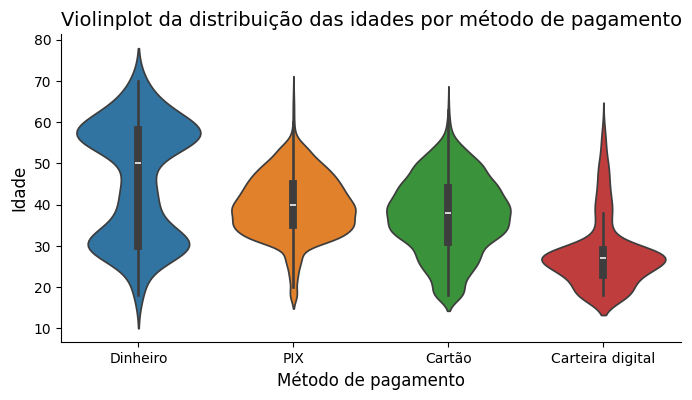

In [ ]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(8, 4))

# Plotando o gráfico
sns.violinplot(x='metodo_pagamento', y='idade', data=df, hue='metodo_pagamento')

# Definindo o título do gráfico
plt.title('Violinplot da distribuição das idades por método de pagamento', loc='left', fontsize=14)

# Definindo a label do eixo x
plt.xlabel('Método de pagamento', fontsize=12)

# Definindo a label do eixo y
plt.ylabel('Idade', fontsize=12)

# Removendo a borda do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()